# Plot Various Experiment Results 
In this notebook, I will try to organize the experiment data I got and plot them into various plots to aid analyzing the experiment. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the Model-free Solution Result

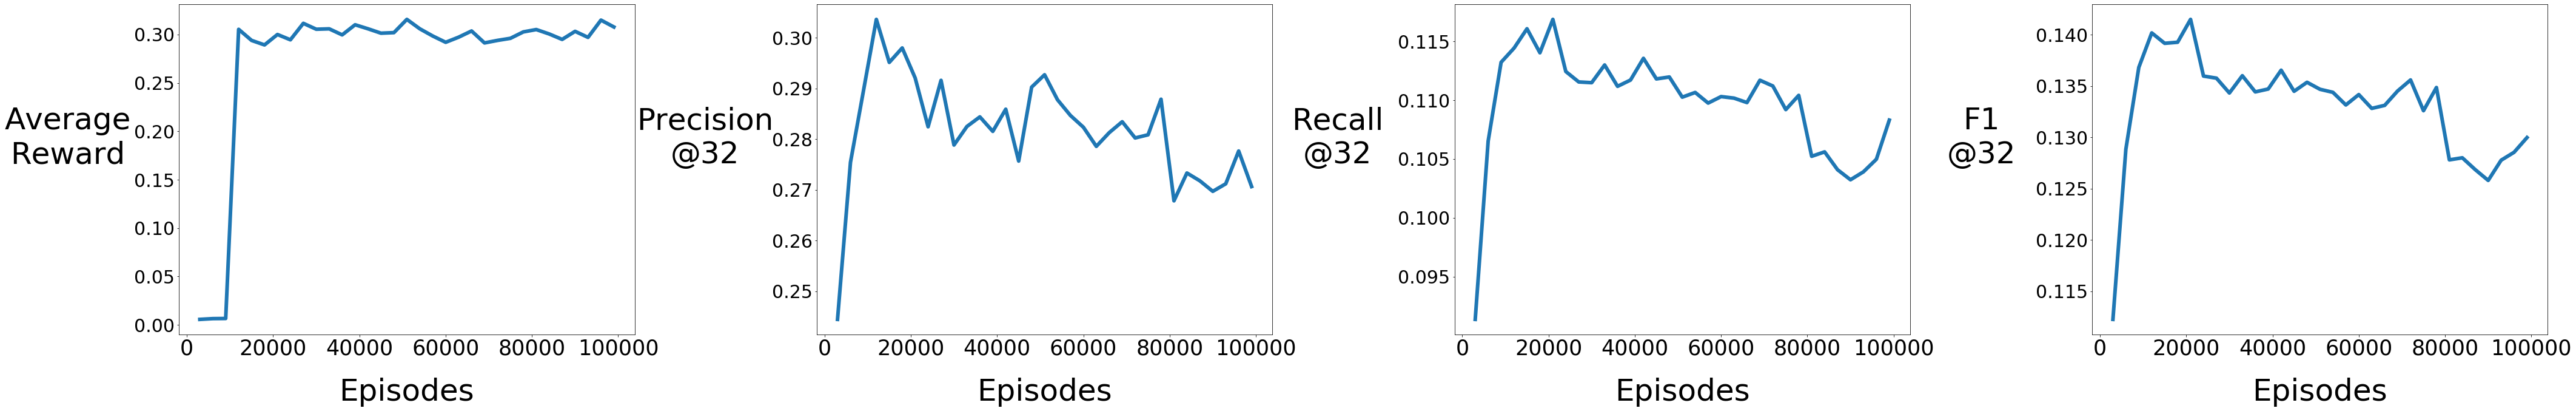

In [13]:
# Load Data
data_path_model_free_solution = '/home/xiang/Desktop/Graduation_Thesis/data/model_free_solution/entropy_0.0'
image_path = '/home/xiang/Desktop/Graduation_Thesis/figures/results/model_free_solution'
data_model_free_solution = np.loadtxt(data_path_model_free_solution, delimiter="::")
m = data_model_free_solution.shape[0]

# Plot Data
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(70, 10)

# shared x-axis
x = np.arange(1, m+1) * 3000

axes[0].plot(x,data_model_free_solution[:, 0], linewidth=6)
axes[1].plot(x,data_model_free_solution[:, 1], linewidth=6)
axes[2].plot(x,data_model_free_solution[:, 2], linewidth=6)
axes[3].plot(x,data_model_free_solution[:, 3], linewidth=6)

axes[0].set_ylabel("Average\nReward", rotation="horizontal", labelpad=110, size=50)
axes[1].set_ylabel("Precision\n@32", rotation="horizontal", labelpad=110, size=50)
axes[2].set_ylabel("Recall\n@32", rotation="horizontal", labelpad=100, size=50)
axes[3].set_ylabel("F1\n@32", rotation="horizontal", labelpad=90, size=50)
axes[0].set_xlabel("Episodes", labelpad=30, size=50)
axes[1].set_xlabel("Episodes", labelpad=30, size=50)
axes[2].set_xlabel("Episodes", labelpad=30, size=50)
axes[3].set_xlabel("Episodes", labelpad=30, size=50)

axes[0].tick_params(axis='y', labelsize=30)
axes[1].tick_params(axis='y', labelsize=30)
axes[2].tick_params(axis='y', labelsize=30)
axes[3].tick_params(axis='y', labelsize=30)
axes[0].tick_params(axis='x', labelsize=35)
axes[1].tick_params(axis='x', labelsize=35)
axes[2].tick_params(axis='x', labelsize=35)
axes[3].tick_params(axis='x', labelsize=35)

plt.subplots_adjust(wspace=0.4)

fig.savefig(image_path, bbox_inches='tight')

# (Model-free Solution) Plot Influences of State Representation
This section will plot the figure of model-free solution with different state representation. Both figures do not use entropy nor masking. The difference is that one figure uses pre-trained state representation weights while the other uses initial (random) state representation weights.

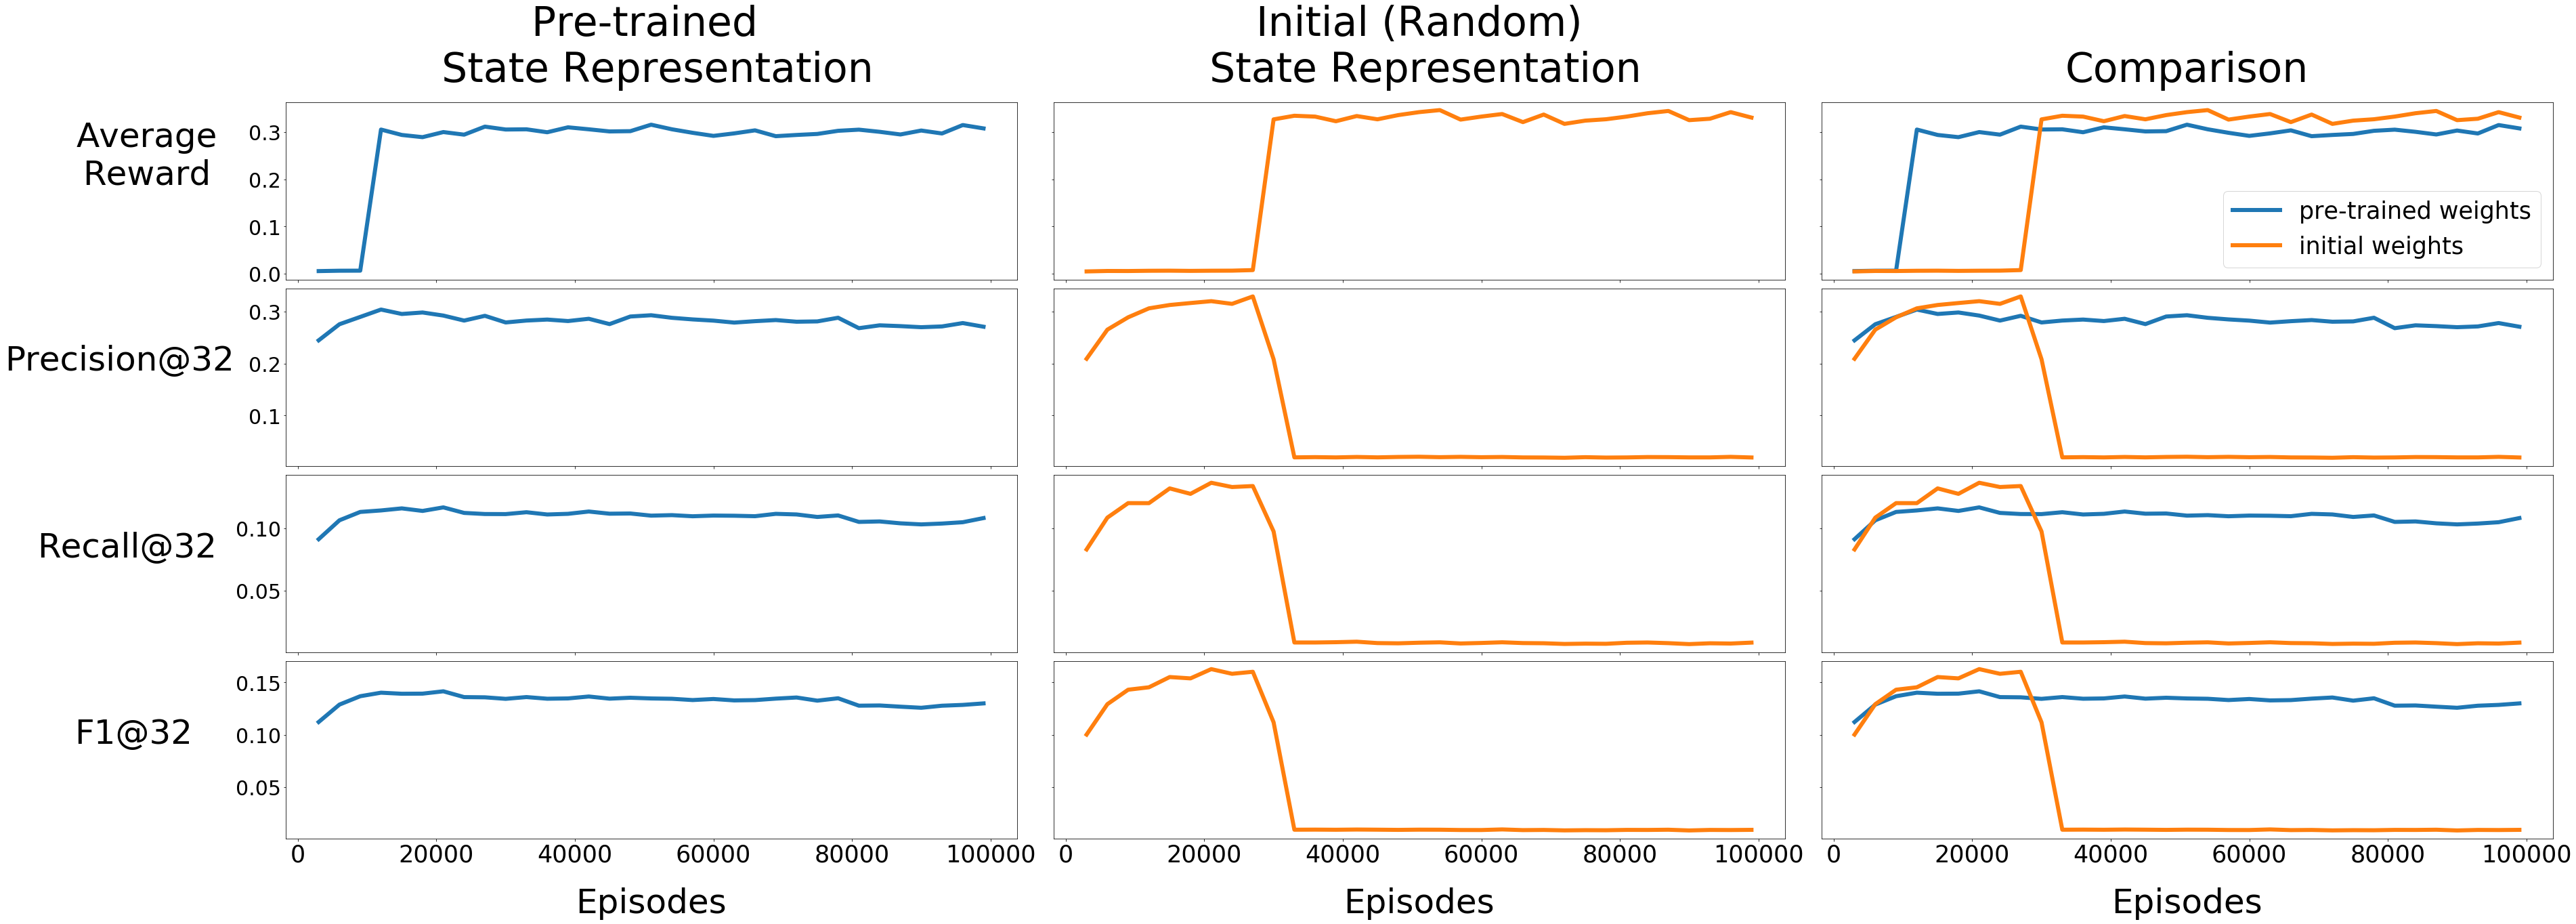

In [4]:
# Load Data
data_path_pretrain_weights =  '/home/xiang/Desktop/Graduation_Thesis/data/model_free_solution/entropy_0.0'
data_path_initial_weights =  '/home/xiang/Desktop/Graduation_Thesis/data/model_free_solution/entropy_0.0_initial_weights'
image_path = '/home/xiang/Desktop/Graduation_Thesis/figures/results/state_representation_influence'

data_pretrain_weights = np.loadtxt(data_path_pretrain_weights, delimiter="::")
data_initial_weights = np.loadtxt(data_path_initial_weights, delimiter="::")

# Make sure both data files have the same number of data points
m = min(data_pretrain_weights.shape[0], data_initial_weights.shape[0])
data_pretrain_weights = data_pretrain_weights[0:m]
data_initial_weights = data_initial_weights[0:m]

assert data_pretrain_weights.shape[0] == data_initial_weights.shape[0] == m


# Plot Data
fig, axes = plt.subplots(4, 3, sharex='all', sharey='row')
fig.set_size_inches(60, 20)

# shared x-axis
x = np.arange(1, m+1) * 3000

axes[0,0].plot(x,data_pretrain_weights[:, 0], linewidth=6)
axes[1,0].plot(x,data_pretrain_weights[:, 1], linewidth=6)
axes[2,0].plot(x,data_pretrain_weights[:, 2], linewidth=6)
axes[3,0].plot(x,data_pretrain_weights[:, 3], linewidth=6)

axes[0,1].plot(x, data_initial_weights[:, 0], color='tab:orange', linewidth=6)
axes[1,1].plot(x, data_initial_weights[:, 1], color='tab:orange', linewidth=6)
axes[2,1].plot(x, data_initial_weights[:, 2], color='tab:orange', linewidth=6)
axes[3,1].plot(x, data_initial_weights[:, 3], color='tab:orange', linewidth=6)


axes[0,2].plot(x,data_pretrain_weights[:, 0], linewidth=6, label='pre-trained weights')
axes[0,2].plot(x,data_initial_weights[:, 0], linewidth=6, label='initial weights')
axes[1,2].plot(x,data_pretrain_weights[:, 1], linewidth=6, label='pre-trained weights')
axes[1,2].plot(x,data_initial_weights[:, 1], linewidth=6, label='initial weights')
axes[2,2].plot(x,data_pretrain_weights[:, 2], linewidth=6, label='pre-trained weights')
axes[2,2].plot(x,data_initial_weights[:, 2], linewidth=6, label='initial weights')
axes[3,2].plot(x,data_pretrain_weights[:, 3], linewidth=6, label='pre-trained weights')
axes[3,2].plot(x,data_initial_weights[:, 3], linewidth=6, label='initial weights')

axes[0,0].set_ylabel("Average\nReward", rotation="horizontal", labelpad=150, size=50)
axes[1,0].set_ylabel("Precision@32", rotation="horizontal", labelpad=190, size=50)
axes[2,0].set_ylabel("Recall@32", rotation="horizontal", labelpad=160, size=50)
axes[3,0].set_ylabel("F1@32", rotation="horizontal", labelpad=150, size=50)
axes[3,0].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,1].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,2].set_xlabel("Episodes", labelpad=30, size=50)


axes[0,0].tick_params(axis='y', labelsize=30)
axes[1,0].tick_params(axis='y', labelsize=30)
axes[2,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='x', labelsize=35)
axes[3,1].tick_params(axis='x', labelsize=35)
axes[3,2].tick_params(axis='x', labelsize=35)

axes[0,0].set_title('Pre-trained \n State Representation', size=60, pad=30)
axes[0,1].set_title('Initial (Random)\n State Representation', size=60, pad=30)
axes[0,2].set_title('Comparison', size=60, pad=30)


plt.subplots_adjust(wspace=0.05, hspace=0.05)
axes[0,2].legend(fontsize=35)

fig.savefig(image_path, bbox_inches='tight')

# (Model-free Solution) Plot Influences of Using Entropy as Exploration Strategy

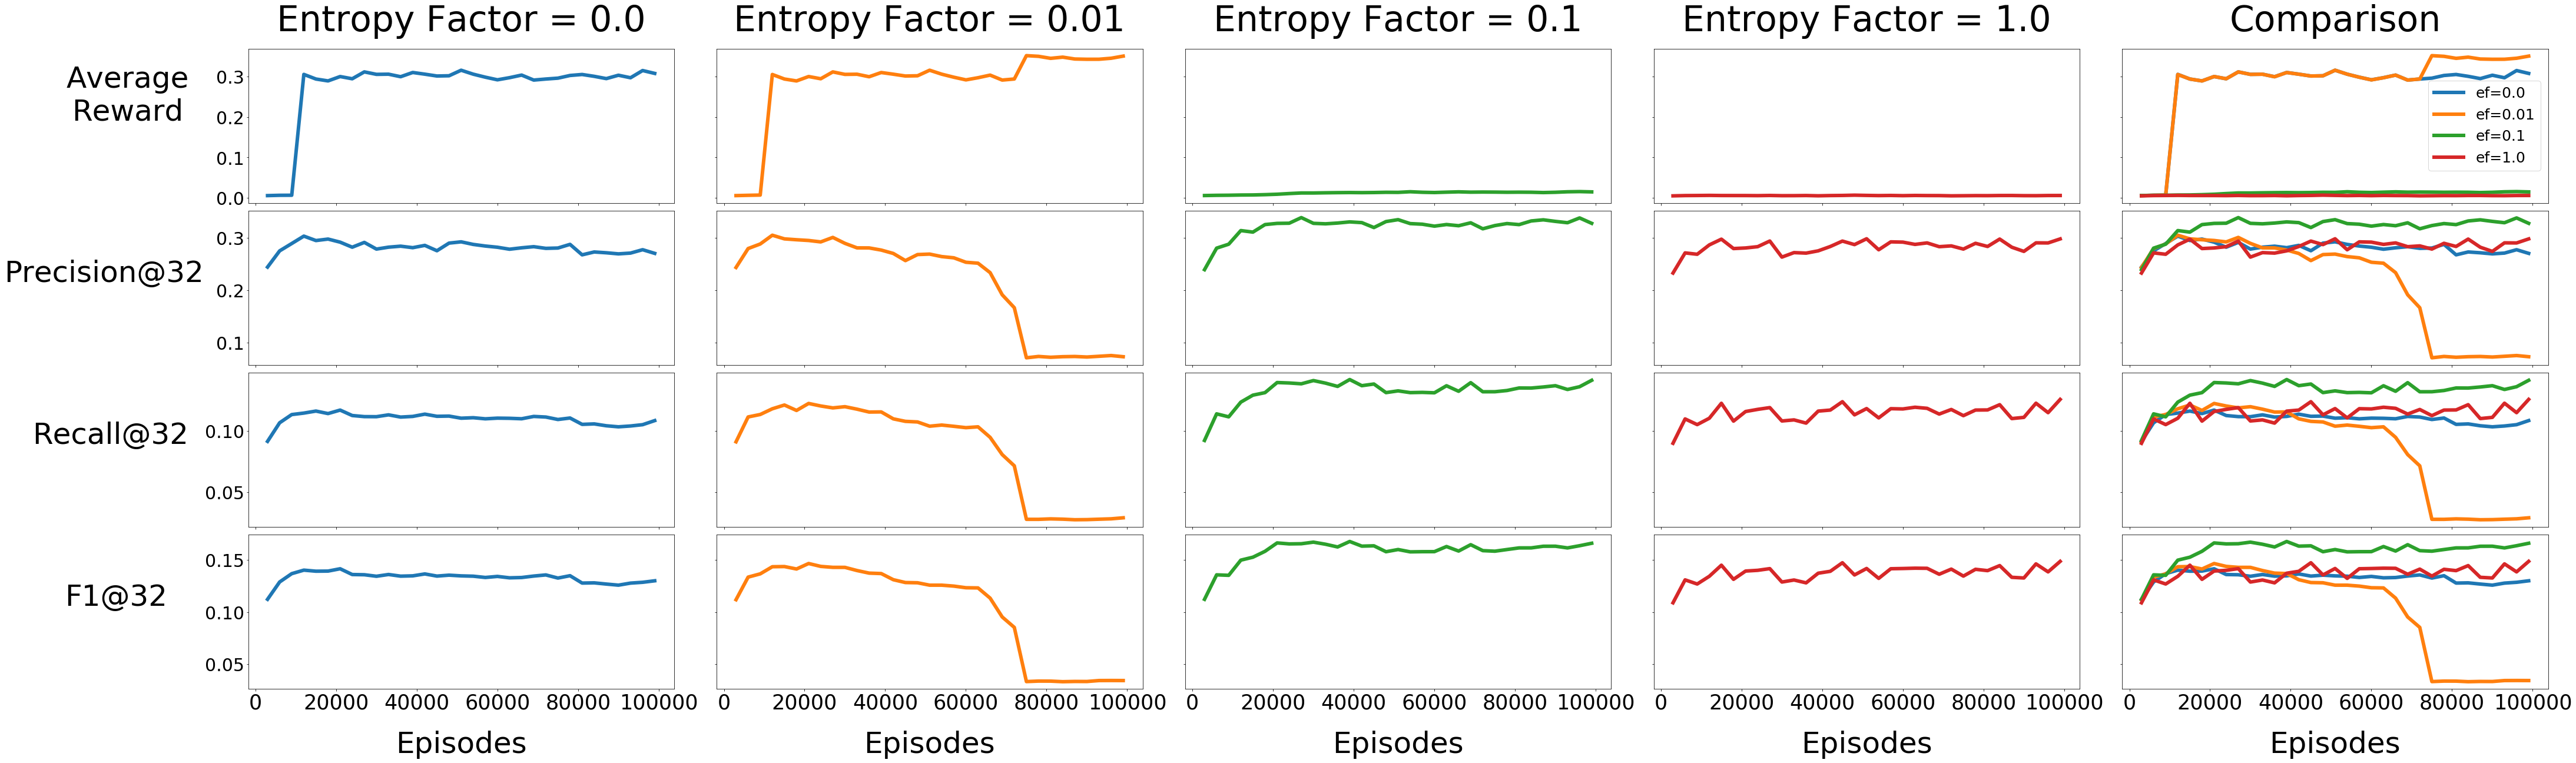

In [7]:
# Load data
data_path_entropy_0_0 = '/home/xiang/Desktop/Graduation_Thesis/data/model_free_solution/entropy_0.0'
data_path_entropy_0_01 = '/home/xiang/Desktop/Graduation_Thesis/data/model_free_solution/entropy_0.01'
data_path_entropy_0_1 = '/home/xiang/Desktop/Graduation_Thesis/data/model_free_solution/entropy_0.1'
data_path_entropy_1_0 = '/home/xiang/Desktop/Graduation_Thesis/data/model_free_solution/entropy_1.0'

image_path = '/home/xiang/Desktop/Graduation_Thesis/figures/results/entropy_influence'

data_entropy_0_0 = np.loadtxt(data_path_entropy_0_0, delimiter="::")
data_entropy_0_01 = np.loadtxt(data_path_entropy_0_01, delimiter="::")
data_entropy_0_1 = np.loadtxt(data_path_entropy_0_1, delimiter="::")
data_entropy_1_0 = np.loadtxt(data_path_entropy_1_0, delimiter="::")

m = min(data_entropy_0_0.shape[0], data_entropy_0_01.shape[0], data_entropy_0_1.shape[0], data_entropy_1_0.shape[0])
data_entropy_0_0 = data_entropy_0_0[0:m]
data_entropy_0_01 = data_entropy_0_01[0:m]
data_entropy_0_1 = data_entropy_0_1[0:m]
data_entropy_1_0 = data_entropy_1_0[0:m]



# Start plotting
fig, axes = plt.subplots(4, 5, sharex='all', sharey='row')
fig.set_size_inches(70, 20)

# shared x-axis
x = np.arange(1, m+1) * 3000

axes[0,0].plot(x,data_entropy_0_0[:, 0], linewidth=6)
axes[1,0].plot(x,data_entropy_0_0[:, 1], linewidth=6)
axes[2,0].plot(x,data_entropy_0_0[:, 2], linewidth=6)
axes[3,0].plot(x,data_entropy_0_0[:, 3], linewidth=6)

axes[0,1].plot(x, data_entropy_0_01[:, 0], color='tab:orange', linewidth=6)
axes[1,1].plot(x, data_entropy_0_01[:, 1], color='tab:orange', linewidth=6)
axes[2,1].plot(x, data_entropy_0_01[:, 2], color='tab:orange', linewidth=6)
axes[3,1].plot(x, data_entropy_0_01[:, 3], color='tab:orange', linewidth=6)

axes[0,2].plot(x, data_entropy_0_1[:, 0], color='tab:green', linewidth=6)
axes[1,2].plot(x, data_entropy_0_1[:, 1], color='tab:green', linewidth=6)
axes[2,2].plot(x, data_entropy_0_1[:, 2], color='tab:green', linewidth=6)
axes[3,2].plot(x, data_entropy_0_1[:, 3], color='tab:green', linewidth=6)

axes[0,3].plot(x, data_entropy_1_0[:, 0], color='tab:red', linewidth=6)
axes[1,3].plot(x, data_entropy_1_0[:, 1], color='tab:red', linewidth=6)
axes[2,3].plot(x, data_entropy_1_0[:, 2], color='tab:red', linewidth=6)
axes[3,3].plot(x, data_entropy_1_0[:, 3], color='tab:red', linewidth=6)


axes[0,4].plot(x,data_entropy_0_0[:, 0], linewidth=6, label='ef=0.0')
axes[0,4].plot(x,data_entropy_0_01[:, 0], linewidth=6, label='ef=0.01')
axes[0,4].plot(x,data_entropy_0_1[:, 0], linewidth=6, label='ef=0.1')
axes[0,4].plot(x,data_entropy_1_0[:, 0], linewidth=6, label='ef=1.0')
axes[1,4].plot(x,data_entropy_0_0[:, 1], linewidth=6)
axes[1,4].plot(x,data_entropy_0_01[:, 1], linewidth=6)
axes[1,4].plot(x,data_entropy_0_1[:, 1], linewidth=6)
axes[1,4].plot(x,data_entropy_1_0[:, 1], linewidth=6)
axes[2,4].plot(x,data_entropy_0_0[:, 2], linewidth=6)
axes[2,4].plot(x,data_entropy_0_01[:, 2], linewidth=6)
axes[2,4].plot(x,data_entropy_0_1[:, 2], linewidth=6)
axes[2,4].plot(x,data_entropy_1_0[:, 2], linewidth=6)
axes[3,4].plot(x,data_entropy_0_0[:, 3], linewidth=6)
axes[3,4].plot(x,data_entropy_0_01[:, 3], linewidth=6)
axes[3,4].plot(x,data_entropy_0_1[:, 3], linewidth=6)
axes[3,4].plot(x,data_entropy_1_0[:, 3], linewidth=6)



axes[0,0].set_ylabel("Average\nReward", rotation="horizontal", labelpad=150, size=50)
axes[1,0].set_ylabel("Precision@32", rotation="horizontal", labelpad=190, size=50)
axes[2,0].set_ylabel("Recall@32", rotation="horizontal", labelpad=160, size=50)
axes[3,0].set_ylabel("F1@32", rotation="horizontal", labelpad=150, size=50)
axes[3,0].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,1].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,2].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,3].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,4].set_xlabel("Episodes", labelpad=30, size=50)


axes[0,0].tick_params(axis='y', labelsize=30)
axes[1,0].tick_params(axis='y', labelsize=30)
axes[2,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='x', labelsize=35)
axes[3,1].tick_params(axis='x', labelsize=35)
axes[3,2].tick_params(axis='x', labelsize=35)
axes[3,3].tick_params(axis='x', labelsize=35)
axes[3,4].tick_params(axis='x', labelsize=35)

axes[0,0].set_title('Entropy Factor = 0.0', size=60, pad=30)
axes[0,1].set_title('Entropy Factor = 0.01', size=60, pad=30)
axes[0,2].set_title('Entropy Factor = 0.1', size=60, pad=30)
axes[0,3].set_title('Entropy Factor = 1.0', size=60, pad=30)
axes[0,4].set_title('Comparison', size=60, pad=30)

plt.subplots_adjust(wspace=0.1, hspace=0.05)
axes[0,4].legend(fontsize=25)

fig.savefig(image_path, bbox_inches='tight')

# (Model-free Solution) Plot Influences of Using Masking as Exploration Strategy

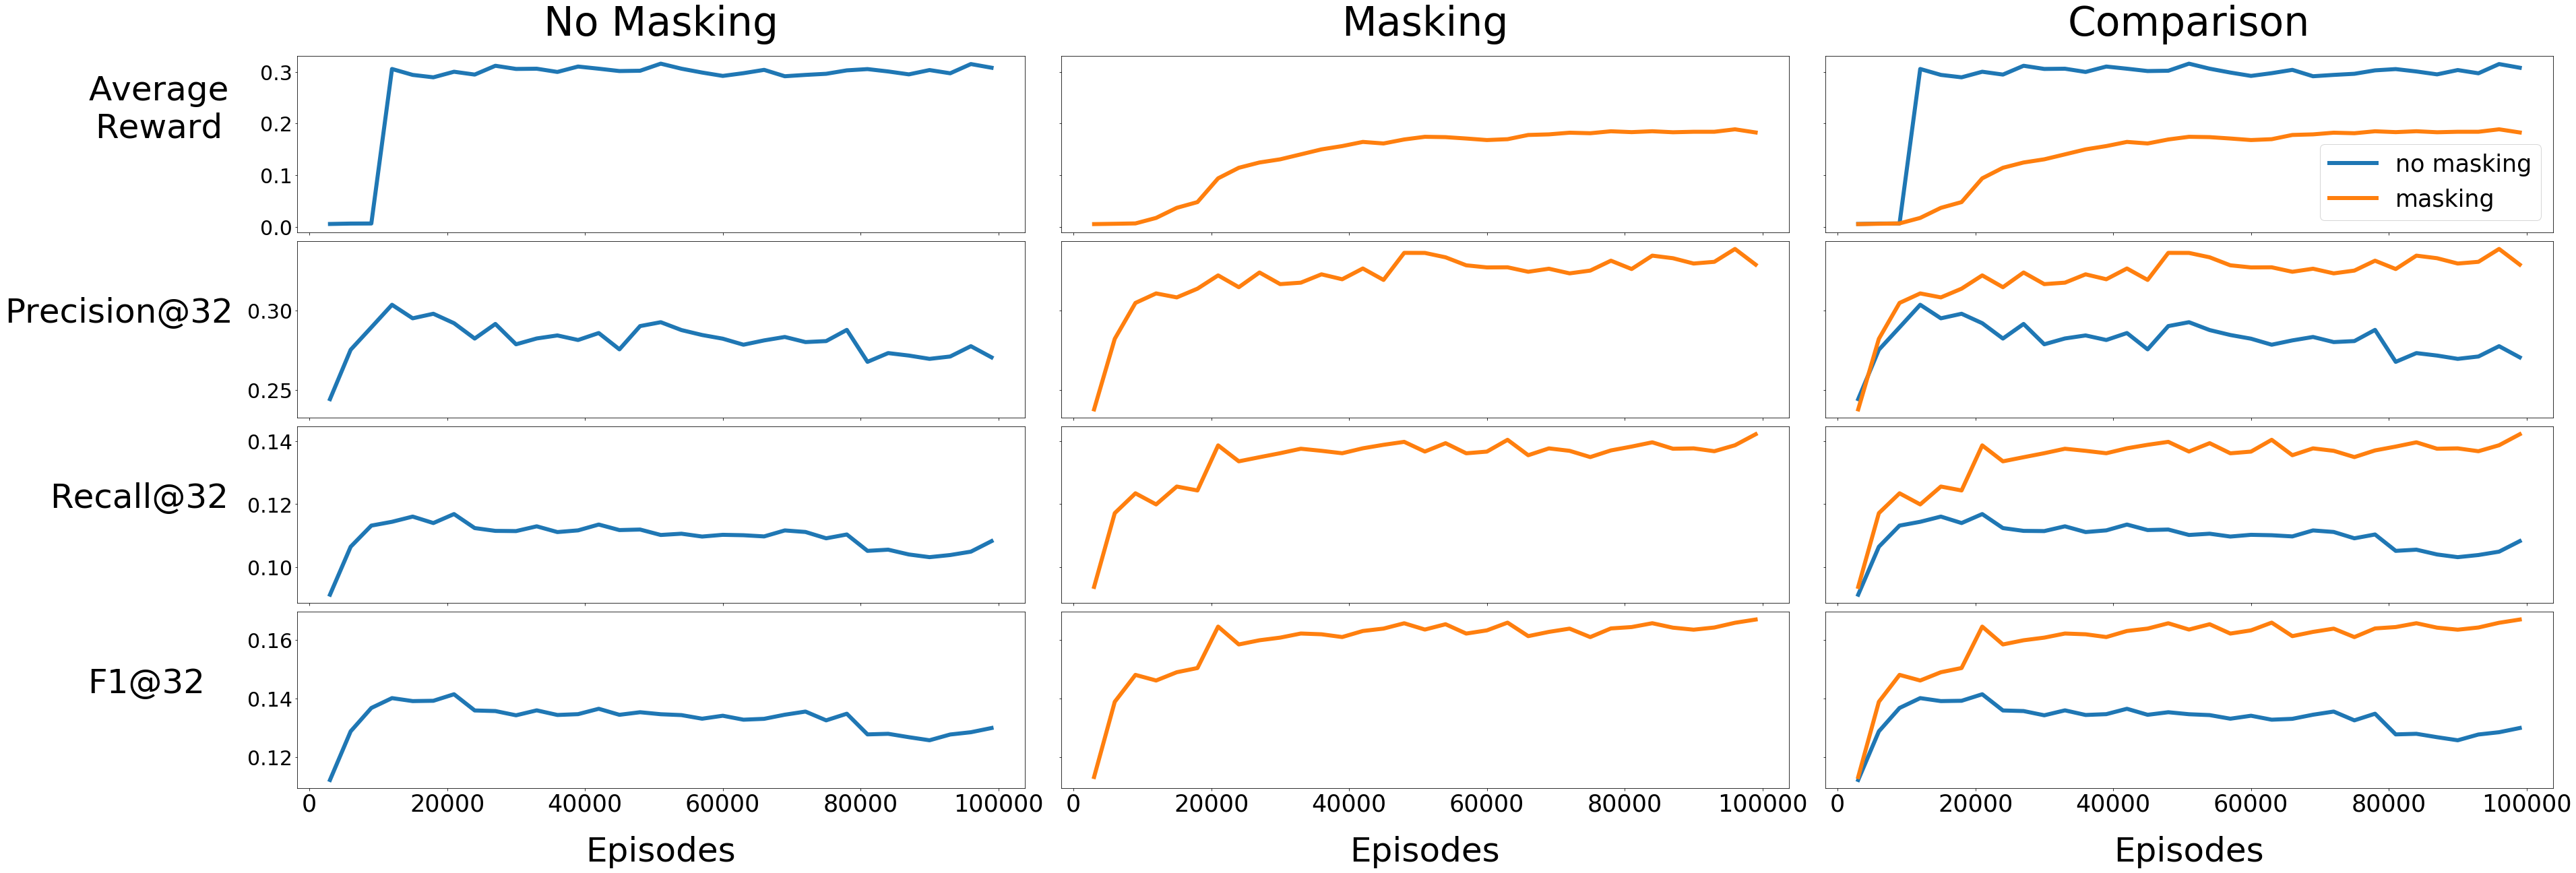

In [5]:
# Load Data
data_path_no_masking =  '/home/xiang/Desktop/Graduation_Thesis/data/model_free_solution/entropy_0.0'
data_path_masking =  '/home/xiang/Desktop/Graduation_Thesis/data/model_free_solution/masking_entropy_0.0'
image_path = '/home/xiang/Desktop/Graduation_Thesis/figures/results/masking_influence'

data_no_masking = np.loadtxt(data_path_no_masking, delimiter="::")
data_masking = np.loadtxt(data_path_masking, delimiter="::")

# Make sure both data files have the same number of data points
m = min(data_no_masking.shape[0], data_masking.shape[0])
data_no_masking = data_no_masking[0:m]
data_masking = data_masking[0:m]

assert data_no_masking.shape[0] == data_masking.shape[0] == m


# Plot Data
fig, axes = plt.subplots(4, 3, sharex='all', sharey='row')
fig.set_size_inches(60, 20)

# shared x-axis
x = np.arange(1, m+1) * 3000

axes[0,0].plot(x,data_no_masking[:, 0], linewidth=6)
axes[1,0].plot(x,data_no_masking[:, 1], linewidth=6)
axes[2,0].plot(x,data_no_masking[:, 2], linewidth=6)
axes[3,0].plot(x,data_no_masking[:, 3], linewidth=6)

axes[0,1].plot(x, data_masking[:, 0], color='tab:orange', linewidth=6)
axes[1,1].plot(x, data_masking[:, 1], color='tab:orange', linewidth=6)
axes[2,1].plot(x, data_masking[:, 2], color='tab:orange', linewidth=6)
axes[3,1].plot(x, data_masking[:, 3], color='tab:orange', linewidth=6)


axes[0,2].plot(x,data_no_masking[:, 0], linewidth=6, label='no masking')
axes[0,2].plot(x,data_masking[:, 0], linewidth=6, label='masking')
axes[1,2].plot(x,data_no_masking[:, 1], linewidth=6)
axes[1,2].plot(x,data_masking[:, 1], linewidth=6)
axes[2,2].plot(x,data_no_masking[:, 2], linewidth=6)
axes[2,2].plot(x,data_masking[:, 2], linewidth=6)
axes[3,2].plot(x,data_no_masking[:, 3], linewidth=6)
axes[3,2].plot(x,data_masking[:, 3], linewidth=6)

axes[0,0].set_ylabel("Average\nReward", rotation="horizontal", labelpad=150, size=50)
axes[1,0].set_ylabel("Precision@32", rotation="horizontal", labelpad=190, size=50)
axes[2,0].set_ylabel("Recall@32", rotation="horizontal", labelpad=160, size=50)
axes[3,0].set_ylabel("F1@32", rotation="horizontal", labelpad=150, size=50)
axes[3,0].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,1].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,2].set_xlabel("Episodes", labelpad=30, size=50)


axes[0,0].tick_params(axis='y', labelsize=30)
axes[1,0].tick_params(axis='y', labelsize=30)
axes[2,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='x', labelsize=35)
axes[3,1].tick_params(axis='x', labelsize=35)
axes[3,2].tick_params(axis='x', labelsize=35)

axes[0,0].set_title('No Masking', size=60, pad=30)
axes[0,1].set_title('Masking', size=60, pad=30)
axes[0,2].set_title('Comparison', size=60, pad=30)


plt.subplots_adjust(wspace=0.05, hspace=0.05)
axes[0,2].legend(fontsize=35)

fig.savefig(image_path, bbox_inches='tight')

# (Model-free Solution) Maybe Try Both Masking AND Entropy?

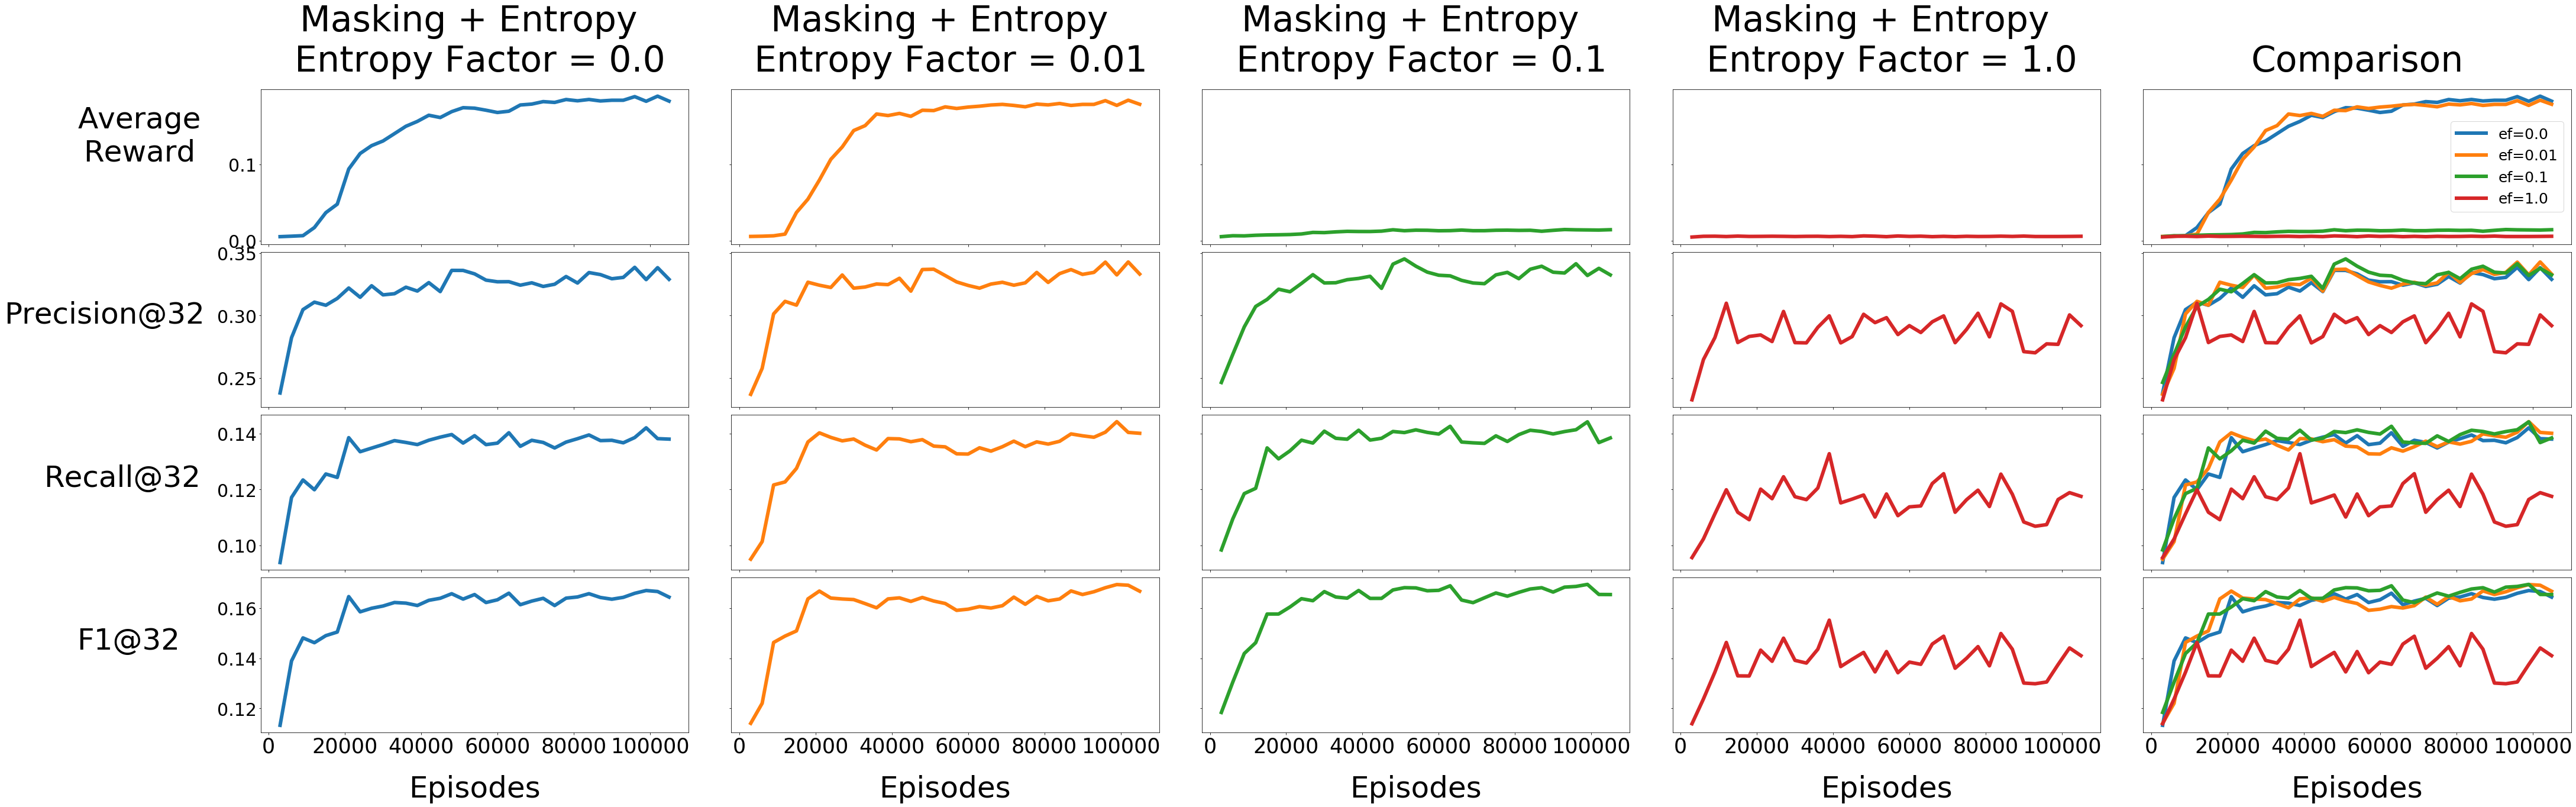

In [8]:
# Load data
data_path_masking_entropy_0_0 = '/home/xiang/Desktop/Graduation_Thesis/data/model_free_solution/masking_entropy_0.0'
data_path_masking_entropy_0_01 = '/home/xiang/Desktop/Graduation_Thesis/data/model_free_solution/masking_entropy_0.01'
data_path_masking_entropy_0_1 = '/home/xiang/Desktop/Graduation_Thesis/data/model_free_solution/masking_entropy_0.1'
data_path_masking_entropy_1_0 = '/home/xiang/Desktop/Graduation_Thesis/data/model_free_solution/masking_entropy_1.0'

image_path = '/home/xiang/Desktop/Graduation_Thesis/figures/results/masking_and_entropy_influence'

data_masking_entropy_0_0 = np.loadtxt(data_path_masking_entropy_0_0, delimiter="::")
data_masking_entropy_0_01 = np.loadtxt(data_path_masking_entropy_0_01, delimiter="::")
data_masking_entropy_0_1 = np.loadtxt(data_path_masking_entropy_0_1, delimiter="::")
data_masking_entropy_1_0 = np.loadtxt(data_path_masking_entropy_1_0, delimiter="::")

m = min(data_masking_entropy_0_0.shape[0], data_masking_entropy_0_01.shape[0], data_masking_entropy_0_1.shape[0], data_masking_entropy_1_0.shape[0])
data_masking_entropy_0_0 = data_masking_entropy_0_0[0:m]
data_masking_entropy_0_01 = data_masking_entropy_0_01[0:m]
data_masking_entropy_0_1 = data_masking_entropy_0_1[0:m]
data_masking_entropy_1_0 = data_masking_entropy_1_0[0:m]



# Start plotting
fig, axes = plt.subplots(4, 5, sharex='all', sharey='row')
fig.set_size_inches(70, 20)

# shared x-axis
x = np.arange(1, m+1) * 3000

axes[0,0].plot(x,data_masking_entropy_0_0[:, 0], linewidth=6)
axes[1,0].plot(x,data_masking_entropy_0_0[:, 1], linewidth=6)
axes[2,0].plot(x,data_masking_entropy_0_0[:, 2], linewidth=6)
axes[3,0].plot(x,data_masking_entropy_0_0[:, 3], linewidth=6)

axes[0,1].plot(x, data_masking_entropy_0_01[:, 0], color='tab:orange', linewidth=6)
axes[1,1].plot(x, data_masking_entropy_0_01[:, 1], color='tab:orange', linewidth=6)
axes[2,1].plot(x, data_masking_entropy_0_01[:, 2], color='tab:orange', linewidth=6)
axes[3,1].plot(x, data_masking_entropy_0_01[:, 3], color='tab:orange', linewidth=6)

axes[0,2].plot(x, data_masking_entropy_0_1[:, 0], color='tab:green', linewidth=6)
axes[1,2].plot(x, data_masking_entropy_0_1[:, 1], color='tab:green', linewidth=6)
axes[2,2].plot(x, data_masking_entropy_0_1[:, 2], color='tab:green', linewidth=6)
axes[3,2].plot(x, data_masking_entropy_0_1[:, 3], color='tab:green', linewidth=6)

axes[0,3].plot(x, data_masking_entropy_1_0[:, 0], color='tab:red', linewidth=6)
axes[1,3].plot(x, data_masking_entropy_1_0[:, 1], color='tab:red', linewidth=6)
axes[2,3].plot(x, data_masking_entropy_1_0[:, 2], color='tab:red', linewidth=6)
axes[3,3].plot(x, data_masking_entropy_1_0[:, 3], color='tab:red', linewidth=6)


axes[0,4].plot(x,data_masking_entropy_0_0[:, 0], linewidth=6, label='ef=0.0')
axes[0,4].plot(x,data_masking_entropy_0_01[:, 0], linewidth=6, label='ef=0.01')
axes[0,4].plot(x,data_masking_entropy_0_1[:, 0], linewidth=6, label='ef=0.1')
axes[0,4].plot(x,data_masking_entropy_1_0[:, 0], linewidth=6, label='ef=1.0')
axes[1,4].plot(x,data_masking_entropy_0_0[:, 1], linewidth=6)
axes[1,4].plot(x,data_masking_entropy_0_01[:, 1], linewidth=6)
axes[1,4].plot(x,data_masking_entropy_0_1[:, 1], linewidth=6)
axes[1,4].plot(x,data_masking_entropy_1_0[:, 1], linewidth=6)
axes[2,4].plot(x,data_masking_entropy_0_0[:, 2], linewidth=6)
axes[2,4].plot(x,data_masking_entropy_0_01[:, 2], linewidth=6)
axes[2,4].plot(x,data_masking_entropy_0_1[:, 2], linewidth=6)
axes[2,4].plot(x,data_masking_entropy_1_0[:, 2], linewidth=6)
axes[3,4].plot(x,data_masking_entropy_0_0[:, 3], linewidth=6)
axes[3,4].plot(x,data_masking_entropy_0_01[:, 3], linewidth=6)
axes[3,4].plot(x,data_masking_entropy_0_1[:, 3], linewidth=6)
axes[3,4].plot(x,data_masking_entropy_1_0[:, 3], linewidth=6)



axes[0,0].set_ylabel("Average\nReward", rotation="horizontal", labelpad=150, size=50)
axes[1,0].set_ylabel("Precision@32", rotation="horizontal", labelpad=190, size=50)
axes[2,0].set_ylabel("Recall@32", rotation="horizontal", labelpad=160, size=50)
axes[3,0].set_ylabel("F1@32", rotation="horizontal", labelpad=150, size=50)
axes[3,0].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,1].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,2].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,3].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,4].set_xlabel("Episodes", labelpad=30, size=50)


axes[0,0].tick_params(axis='y', labelsize=30)
axes[1,0].tick_params(axis='y', labelsize=30)
axes[2,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='x', labelsize=35)
axes[3,1].tick_params(axis='x', labelsize=35)
axes[3,2].tick_params(axis='x', labelsize=35)
axes[3,3].tick_params(axis='x', labelsize=35)
axes[3,4].tick_params(axis='x', labelsize=35)

axes[0,0].set_title('Masking + Entropy \n Entropy Factor = 0.0', size=60, pad=30)
axes[0,1].set_title('Masking + Entropy \n Entropy Factor = 0.01', size=60, pad=30)
axes[0,2].set_title('Masking + Entropy \n Entropy Factor = 0.1', size=60, pad=30)
axes[0,3].set_title('Masking + Entropy \n Entropy Factor = 1.0', size=60, pad=30)
axes[0,4].set_title('Comparison', size=60, pad=30)

plt.subplots_adjust(wspace=0.1, hspace=0.05)
axes[0,4].legend(fontsize=25)

fig.savefig(image_path, bbox_inches='tight')

# Model-free Solution v.s. Model-based Solution (Use Masking but No Entropy)

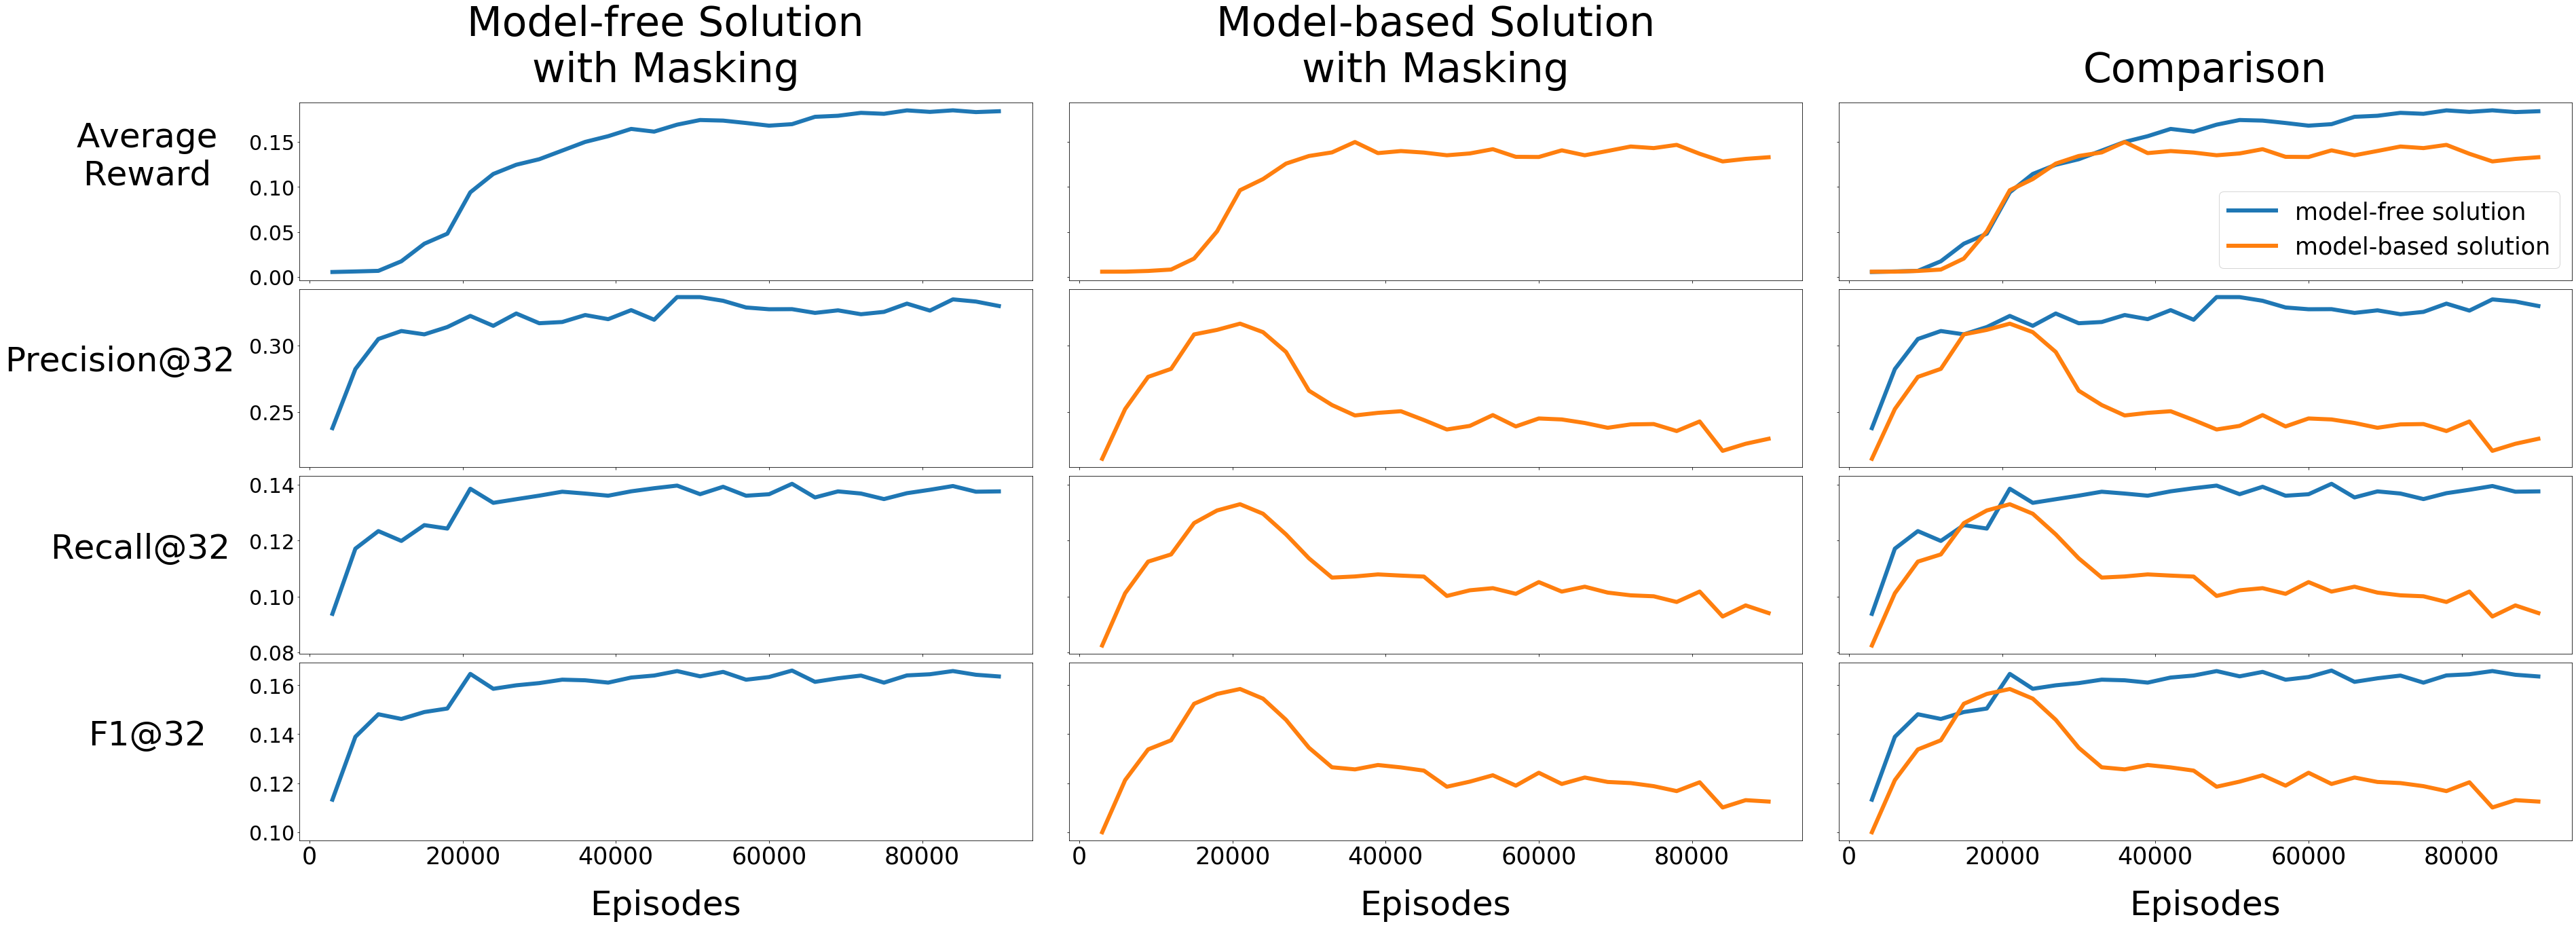

In [14]:
# Load Data
data_path_model_free_solution =  '/home/xiang/Desktop/Graduation_Thesis/data/model_free_solution/masking_entropy_0.0'
data_path_model_based_solution =  '/home/xiang/Desktop/Graduation_Thesis/data/model_based_solution/masking_entropy_0.0'
image_path = '/home/xiang/Desktop/Graduation_Thesis/figures/results/model_free_vs_model_based'

data_model_free_solution = np.loadtxt(data_path_model_free_solution, delimiter="::")
data_model_based_solution = np.loadtxt(data_path_model_based_solution, delimiter="::")

# Make sure both data files have the same number of data points
m = min(data_model_free_solution.shape[0], data_model_based_solution.shape[0])
data_model_free_solution = data_model_free_solution[0:m]
data_model_based_solution = data_model_based_solution[0:m]

assert data_model_free_solution.shape[0] == data_model_based_solution.shape[0] == m


# Plot Data
fig, axes = plt.subplots(4, 3, sharex='all', sharey='row')
fig.set_size_inches(60, 20)

# shared x-axis
x = np.arange(1, m+1) * 3000

axes[0,0].plot(x,data_model_free_solution[:, 0], linewidth=6)
axes[1,0].plot(x,data_model_free_solution[:, 1], linewidth=6)
axes[2,0].plot(x,data_model_free_solution[:, 2], linewidth=6)
axes[3,0].plot(x,data_model_free_solution[:, 3], linewidth=6)

axes[0,1].plot(x, data_model_based_solution[:, 0], color='tab:orange', linewidth=6)
axes[1,1].plot(x, data_model_based_solution[:, 1], color='tab:orange', linewidth=6)
axes[2,1].plot(x, data_model_based_solution[:, 2], color='tab:orange', linewidth=6)
axes[3,1].plot(x, data_model_based_solution[:, 3], color='tab:orange', linewidth=6)


axes[0,2].plot(x,data_model_free_solution[:, 0], linewidth=6, label='model-free solution')
axes[0,2].plot(x,data_model_based_solution[:, 0], linewidth=6, label='model-based solution')
axes[1,2].plot(x,data_model_free_solution[:, 1], linewidth=6)
axes[1,2].plot(x,data_model_based_solution[:, 1], linewidth=6)
axes[2,2].plot(x,data_model_free_solution[:, 2], linewidth=6)
axes[2,2].plot(x,data_model_based_solution[:, 2], linewidth=6)
axes[3,2].plot(x,data_model_free_solution[:, 3], linewidth=6)
axes[3,2].plot(x,data_model_based_solution[:, 3], linewidth=6)

axes[0,0].set_ylabel("Average\nReward", rotation="horizontal", labelpad=150, size=50)
axes[1,0].set_ylabel("Precision@32", rotation="horizontal", labelpad=190, size=50)
axes[2,0].set_ylabel("Recall@32", rotation="horizontal", labelpad=160, size=50)
axes[3,0].set_ylabel("F1@32", rotation="horizontal", labelpad=150, size=50)
axes[3,0].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,1].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,2].set_xlabel("Episodes", labelpad=30, size=50)


axes[0,0].tick_params(axis='y', labelsize=30)
axes[1,0].tick_params(axis='y', labelsize=30)
axes[2,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='x', labelsize=35)
axes[3,1].tick_params(axis='x', labelsize=35)
axes[3,2].tick_params(axis='x', labelsize=35)

axes[0,0].set_title('Model-free Solution\nwith Masking', size=60, pad=30)
axes[0,1].set_title('Model-based Solution\nwith Masking', size=60, pad=30)
axes[0,2].set_title('Comparison', size=60, pad=30)


plt.subplots_adjust(wspace=0.05, hspace=0.05)
axes[0,2].legend(fontsize=35)

fig.savefig(image_path, bbox_inches='tight')

# How about Experience Replay Solution (AKA Memory-based Solution)?

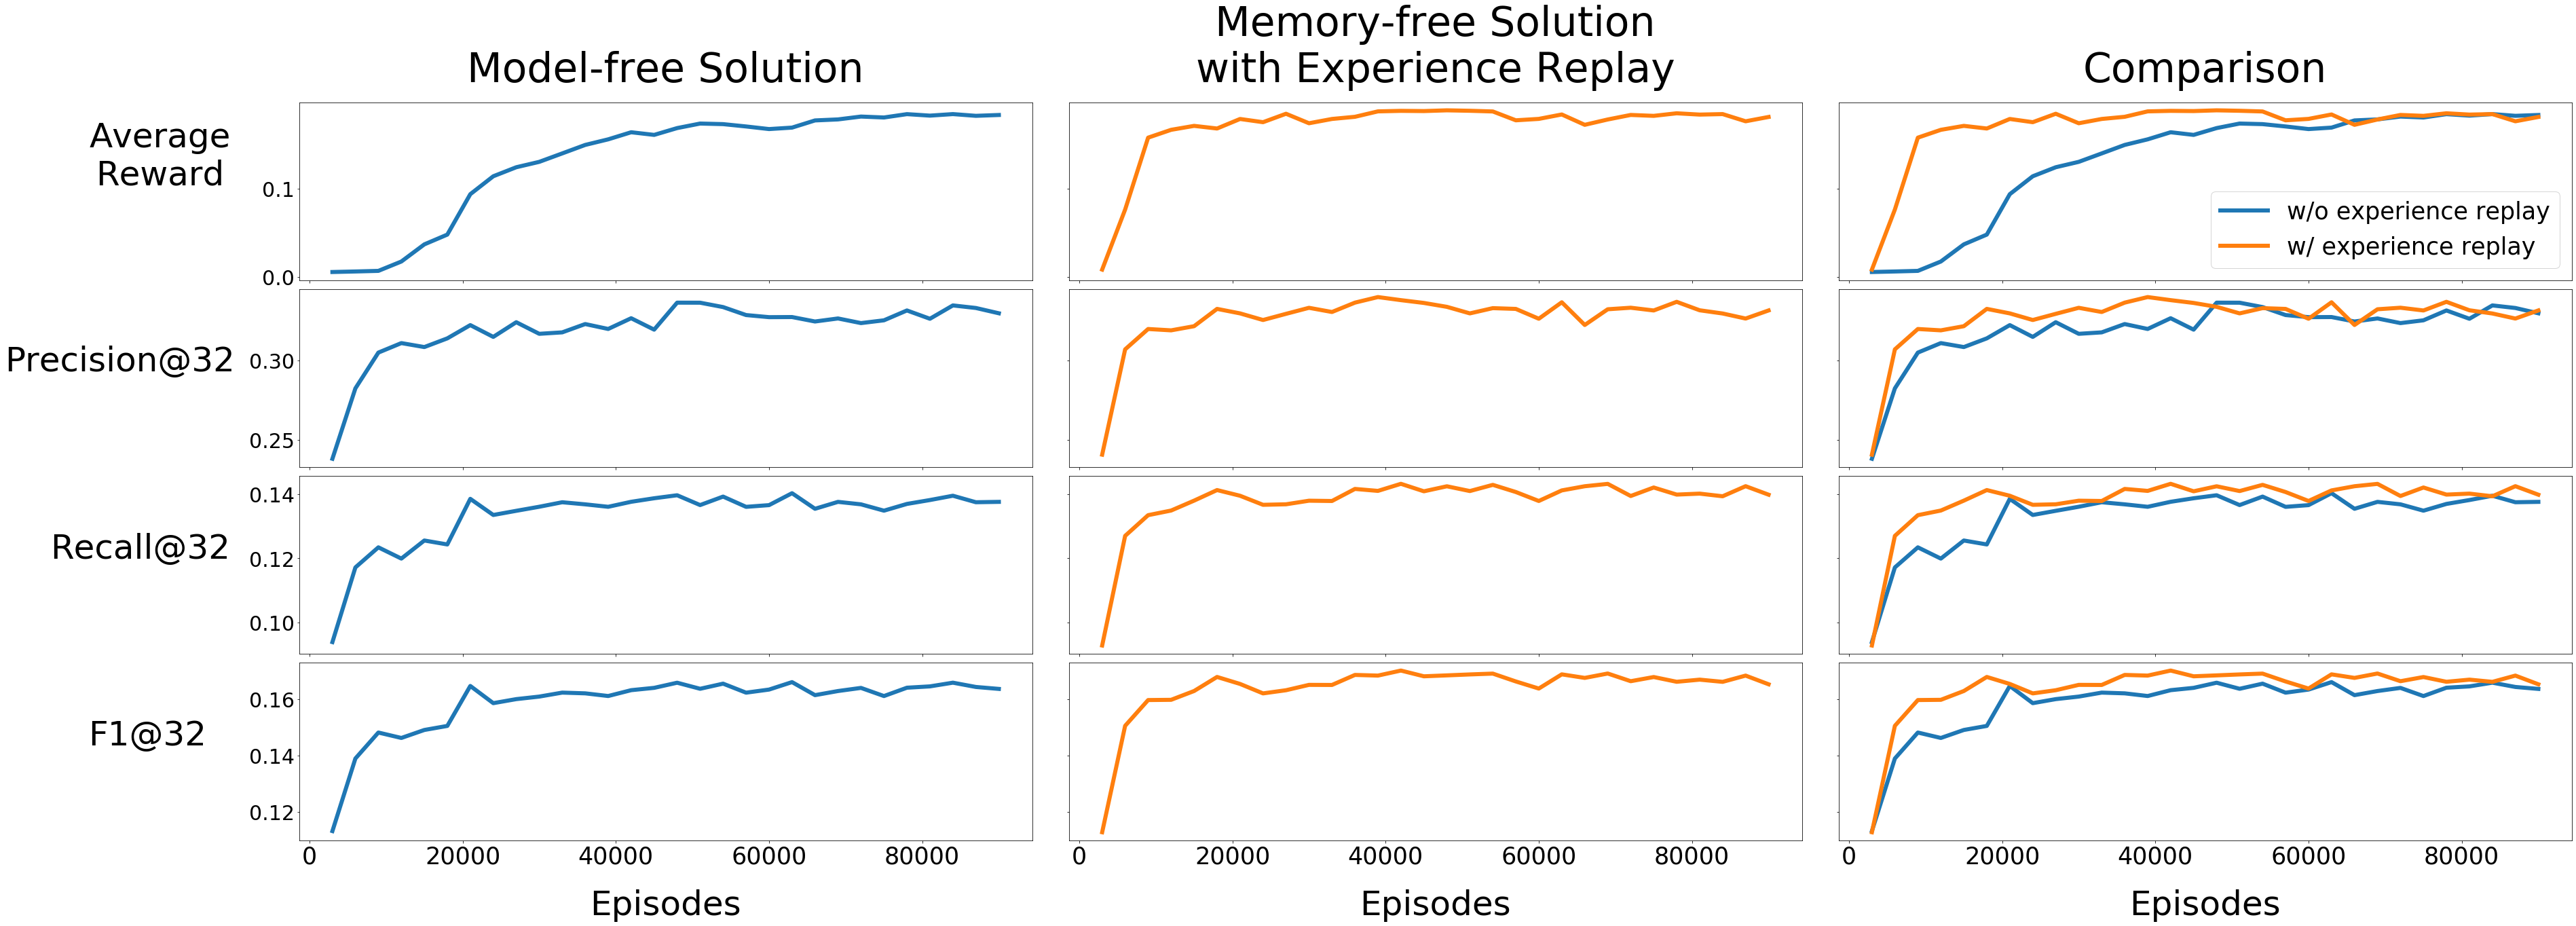

In [6]:
# Load Data
data_path_model_free_solution =  '/home/xiang/Desktop/Graduation_Thesis/data/model_free_solution/masking_entropy_0.0'
data_path_memory_based_solution =  '/home/xiang/Desktop/Graduation_Thesis/data/memory_based_solution/masking_entropy_0.0'
image_path = '/home/xiang/Desktop/Graduation_Thesis/figures/results/model_free_vs_memory_based'

data_model_free_solution = np.loadtxt(data_path_model_free_solution, delimiter="::")
data_memory_based_solution = np.loadtxt(data_path_memory_based_solution, delimiter="::")

# Make sure both data files have the same number of data points
m = min(data_model_free_solution.shape[0], data_memory_based_solution.shape[0])
data_model_free_solution = data_model_free_solution[0:m]
data_memory_based_solution = data_memory_based_solution[0:m]

assert data_model_free_solution.shape[0] == data_memory_based_solution.shape[0] == m


# Plot Data
fig, axes = plt.subplots(4, 3, sharex='all', sharey='row')
fig.set_size_inches(60, 20)

# shared x-axis
x = np.arange(1, m+1) * 3000

axes[0,0].plot(x,data_model_free_solution[:, 0], linewidth=6)
axes[1,0].plot(x,data_model_free_solution[:, 1], linewidth=6)
axes[2,0].plot(x,data_model_free_solution[:, 2], linewidth=6)
axes[3,0].plot(x,data_model_free_solution[:, 3], linewidth=6)

axes[0,1].plot(x, data_memory_based_solution[:, 0], color='tab:orange', linewidth=6)
axes[1,1].plot(x, data_memory_based_solution[:, 1], color='tab:orange', linewidth=6)
axes[2,1].plot(x, data_memory_based_solution[:, 2], color='tab:orange', linewidth=6)
axes[3,1].plot(x, data_memory_based_solution[:, 3], color='tab:orange', linewidth=6)


axes[0,2].plot(x,data_model_free_solution[:, 0], linewidth=6, label='w/o experience replay')
axes[0,2].plot(x,data_memory_based_solution[:, 0], linewidth=6, label='w/ experience replay')
axes[1,2].plot(x,data_model_free_solution[:, 1], linewidth=6)
axes[1,2].plot(x,data_memory_based_solution[:, 1], linewidth=6)
axes[2,2].plot(x,data_model_free_solution[:, 2], linewidth=6)
axes[2,2].plot(x,data_memory_based_solution[:, 2], linewidth=6)
axes[3,2].plot(x,data_model_free_solution[:, 3], linewidth=6)
axes[3,2].plot(x,data_memory_based_solution[:, 3], linewidth=6)

axes[0,0].set_ylabel("Average\nReward", rotation="horizontal", labelpad=150, size=50)
axes[1,0].set_ylabel("Precision@32", rotation="horizontal", labelpad=190, size=50)
axes[2,0].set_ylabel("Recall@32", rotation="horizontal", labelpad=160, size=50)
axes[3,0].set_ylabel("F1@32", rotation="horizontal", labelpad=150, size=50)
axes[3,0].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,1].set_xlabel("Episodes", labelpad=30, size=50)
axes[3,2].set_xlabel("Episodes", labelpad=30, size=50)


axes[0,0].tick_params(axis='y', labelsize=30)
axes[1,0].tick_params(axis='y', labelsize=30)
axes[2,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='x', labelsize=35)
axes[3,1].tick_params(axis='x', labelsize=35)
axes[3,2].tick_params(axis='x', labelsize=35)

axes[0,0].set_title('Model-free Solution', size=60, pad=30)
axes[0,1].set_title('Memory-free Solution\nwith Experience Replay', size=60, pad=30)
axes[0,2].set_title('Comparison', size=60, pad=30)


plt.subplots_adjust(wspace=0.05, hspace=0.05)
axes[0,2].legend(fontsize=35)

fig.savefig(image_path, bbox_inches='tight')

In [ ]:
data_model_free_solution = np.loadtxt("data_model_free_solution.dat", delimiter="::")
data_model_based_solution = np.loadtxt("data_model_based_solution.dat", delimiter="::")

In [ ]:
fig, axes = plt.subplots(4, 3, sharex='all', sharey='row')
fig.set_size_inches(60, 20)

# shared x-axis
x = np.arange(1, 61) * 3000

axes[0,0].plot(x,data_model_free_solution[:, 0], color='black', linestyle='--', linewidth=6)
axes[1,0].plot(x,data_model_free_solution[:, 1], color='black', linestyle='--', linewidth=6)
axes[2,0].plot(x,data_model_free_solution[:, 2], color='black', linestyle='--', linewidth=6)
axes[3,0].plot(x,data_model_free_solution[:, 3], color='black', linestyle='--', linewidth=6)

axes[0,1].plot(x,data_model_based_solution[:, 0], color='black', linewidth=6)
axes[1,1].plot(x,data_model_based_solution[:, 1], color='black', linewidth=6)
axes[2,1].plot(x,data_model_based_solution[:, 2], color='black', linewidth=6)
axes[3,1].plot(x,data_model_based_solution[:, 3], color='black', linewidth=6)

axes[0,2].plot(x,data_model_free_solution[:, 0], color='black', linestyle='--', linewidth=6, label='model-free')
axes[0,2].plot(x,data_model_based_solution[:, 0], color='black', linewidth=6, label='model-based')
axes[1,2].plot(x,data_model_free_solution[:, 1], color='black', linestyle='--', linewidth=6, label='model-free')
axes[1,2].plot(x,data_model_based_solution[:, 1], color='black', linewidth=6, label='model-based')
axes[2,2].plot(x,data_model_free_solution[:, 2], color='black', linestyle='--', linewidth=6, label='model-free')
axes[2,2].plot(x,data_model_based_solution[:, 2], color='black', linewidth=6, label='model-based')
axes[3,2].plot(x,data_model_free_solution[:, 3], color='black', linestyle='--', linewidth=6, label='model-free')
axes[3,2].plot(x,data_model_based_solution[:, 3], color='black', linewidth=6, label='model-based')

axes[0,0].set_ylabel("Average\nReward", rotation="horizontal", labelpad=150, size=50)
axes[1,0].set_ylabel("Precision@32", rotation="horizontal", labelpad=190, size=50)
axes[2,0].set_ylabel("Recall@32", rotation="horizontal", labelpad=160, size=50)
axes[3,0].set_ylabel("F1@32", rotation="horizontal", labelpad=150, size=50)

axes[0,0].tick_params(axis='y', labelsize=30)
axes[1,0].tick_params(axis='y', labelsize=30)
axes[2,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='y', labelsize=30)
axes[3,0].tick_params(axis='x', labelsize=35)
axes[3,1].tick_params(axis='x', labelsize=35)
axes[3,2].tick_params(axis='x', labelsize=35)

axes[0,0].set_title('Model-free Solution', size=60, pad=30)
axes[0,1].set_title('Model-based Solution', size=60, pad=30)
axes[0,2].set_title('Comparison', size=60, pad=30)


plt.subplots_adjust(wspace=0, hspace=0.1)
axes[0,2].legend(fontsize=35)

fig.savefig('result_figure', bbox_inches='tight')